In [14]:
import selfies as sf
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns

In [9]:
smi = 'COC'
selfie = sf.encoder(smi)
selfie

'[C][O][C]'

Data link (only used 1st chunk to test): https://zenodo.org/records/16417648

In [10]:
table = pq.read_table('data/only-IR-data/IR_data_chunk001_of_009.parquet')
df = table.to_pandas()

In [49]:
print('molecules number:', len(df))
df.head()

molecules number: 20000


,id,smiles,type,Frequency(cm^-1),ir_spectra
0,0,CCOC(=O)C(C#N)C(c1ccc(Cl)cc1)c1ccc(Br)cc1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.33359745, 0.6671949, 1.0007924, 1.3343898, ...","[0.00057427614, -0.000112187394, -0.0003344752..."
1,1,COc1ccc2[nH]c(-c3ccccc3)c(C=C3Oc4cc(O)cc(O)c4C...,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.33359745, 0.6671949, 1.0007924, 1.3343898, ...","[0.00014923606, -0.00022092529, 7.763386e-05, ..."
2,2,COc1cccc([C@@H](Oc2ccc3c(cnn3-c3ccc(F)cc3)c2)[...,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.33359745, 0.6671949, 1.0007924, 1.3343898, ...","[0.00015486937, -0.00011346059, -2.9577986e-05..."
3,3,CCN1CCN(c2cc(N)cc(C(F)(F)F)c2)CC1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[0.33359745, 0.6671949, 1.0007924, 1.3343898, ...","[8.071747e-05, 5.7258285e-07, 5.8733687e-05, 9..."
4,4,Cc1ccc(C(=O)NC2CC2)cc1-c1cc2cn[nH]c(=O)c2s1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.33359745, 0.6671949, 1.0007924, 1.3343898, ...","[0.00010796074, 7.063948e-06, -6.8205714e-05, ..."


In [53]:
smiles = df['smiles']
selfies = list(map(sf.encoder, smiles))
wavelenghts = df['Frequency(cm^-1)']
ir_spectras = df['ir_spectra']

Smiles: Nc1ccc(C(=O)NCCC(=O)O)cc1
Selfies: [N][C][=C][C][=C][Branch1][=N][C][=Branch1][C][=O][N][C][C][C][=Branch1][C][=O][O][C][=C][Ring1][=C]


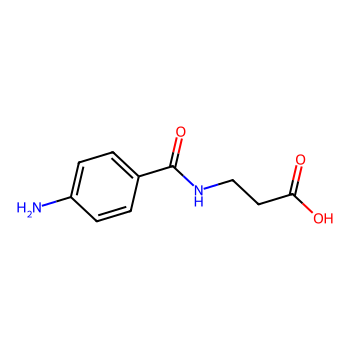

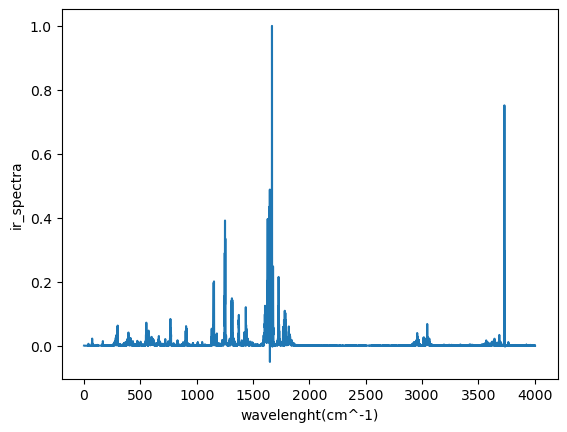

In [54]:
molecule_idx = 12010

smile = smiles[molecule_idx]
print('Smiles:', smile)
print('Selfies:', selfies[molecule_idx])

mol = Chem.MolFromSmiles(smile)
img = Draw.MolToImage(mol, size=(350,350))
display(img)

plt.plot(wavelenghts[molecule_idx], ir_spectras[molecule_idx], label='IR_spectra')
plt.xlabel('wavelenght(cm^-1)')
plt.ylabel('ir_spectra')
plt.show()